In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 16.0 MB/s eta 0:00:00


In [ ]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="y1Rbg9nFTXUeTaPqcV12")
project = rf.workspace("cancer-anotation").project("paps-smear-cells")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Paps-Smear-Cells-4 in yolov11:: 100%|██████████| 4020/4020 [00:01<00:00, 3141.22it/s]


In [ ]:
import matplotlib.pyplot as plt
import cv2

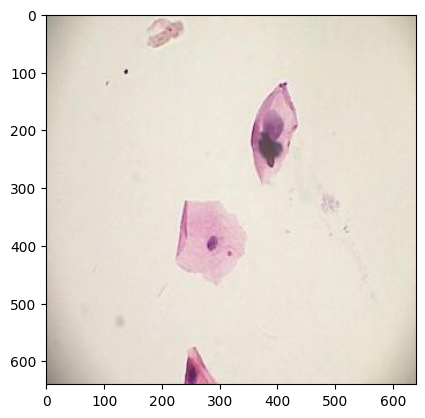

In [ ]:
test_image = cv2.imread("/content/Paps-Smear-Cells-4/test/images/H-CV-2100035-130014_jpg.rf.b9dd27b77c9b52c2655bcdafca108655.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

In [ ]:
print(test_image.size)

In [ ]:
def draw_box(image, x_center_norm, y_center_norm, width_norm, height_norm, color = "green", img_width = 640, img_height = 640):

  match color:
    case "red":
      color = (255, 0, 0)
    case "green":
      color = (0, 255, 0)
    case "blue":
      color = (0, 0, 255)
    case _:
      color = (0, 255, 0)

  x_center_pixel = int(x_center_norm * img_width)
  y_center_pixel = int(y_center_norm * img_height)
  width_pixel = int(width_norm * img_width)
  height_pixel = int(height_norm * img_height)

  # Calculate top-left and bottom-right corners
  x1 = int(x_center_pixel - (width_pixel / 2))
  y1 = int(y_center_pixel - (height_pixel / 2))
  x2 = int(x_center_pixel + (width_pixel / 2))
  y2 = int(y_center_pixel + (height_pixel / 2))

  # Draw the rectangle
  image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

  return image


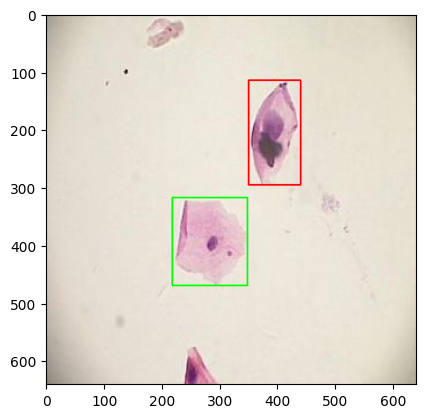

In [ ]:
# green = NORMAL
# red = LSIL
test_img_boxes = draw_box(test_image, 0.4421875, 0.61484375, 0.203125, 0.2375, color = "green")
test_img_boxes = draw_box(test_image, 0.6171875, 0.32109375, 0.140625, 0.28359375, color = "red")

plt.imshow(test_img_boxes)
plt.show()

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 93.9MB/s]


Transferred 499/499 items from pretrained weights


In [ ]:
model.train(data = "/content/Paps-Smear-Cells-4/data.yaml", epochs = 100, imgsz = 640, device = 0, verbose = True, dropout = 0.1, plots = True)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=/content/Paps-Smear-Cells-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Paps-Smear-Cells-4/train/labels... 1851 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1851/1851 [00:01<00:00, 1848.48it/s]


train: New cache created: /content/Paps-Smear-Cells-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Paps-Smear-Cells-4/valid/labels... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<00:00, 1459.26it/s]

val: New cache created: /content/Paps-Smear-Cells-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.6G      1.244      2.409       1.39        138        640: 100%|██████████| 116/116 [00:40<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]

                   all         76        558      0.567      0.416      0.332      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.49G      1.171      1.606      1.322        150        640: 100%|██████████| 116/116 [00:37<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         76        558      0.643       0.43      0.432      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.56G      1.133      1.448      1.273        134        640: 100%|██████████| 116/116 [00:36<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         76        558      0.363      0.579      0.419      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.6G      1.101      1.362      1.253        101        640: 100%|██████████| 116/116 [00:37<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         76        558       0.67      0.447      0.451      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.47G      1.058      1.298      1.228         99        640: 100%|██████████| 116/116 [00:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         76        558      0.461      0.603      0.528       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.61G      1.046      1.245      1.215        150        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         76        558      0.612      0.539      0.533      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.5G      1.052      1.212      1.219        186        640: 100%|██████████| 116/116 [00:38<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         76        558      0.488      0.578      0.523      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.51G      1.036      1.188      1.212        134        640: 100%|██████████| 116/116 [00:41<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         76        558      0.542       0.59      0.541      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.57G      1.017       1.16      1.202        142        640: 100%|██████████| 116/116 [00:39<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         76        558      0.473      0.529      0.504      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.51G     0.9945      1.122      1.185        120        640: 100%|██████████| 116/116 [00:38<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         76        558      0.525      0.542      0.509      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.58G     0.9903      1.105      1.186         95        640: 100%|██████████| 116/116 [00:37<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         76        558      0.555      0.552      0.554      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.56G     0.9848      1.075      1.179         99        640: 100%|██████████| 116/116 [00:41<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         76        558      0.573      0.605      0.588      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.58G     0.9682      1.054      1.166        114        640: 100%|██████████| 116/116 [00:37<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         76        558      0.648      0.542      0.582      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.59G      0.975      1.053      1.175        109        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         76        558      0.434      0.543      0.466      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.59G     0.9552      1.027      1.163        154        640: 100%|██████████| 116/116 [00:38<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         76        558      0.556      0.554      0.565      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.54G      0.939       1.02      1.154        137        640: 100%|██████████| 116/116 [00:39<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         76        558       0.63      0.548      0.588      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.48G     0.9472      0.999      1.159        118        640: 100%|██████████| 116/116 [00:35<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         76        558      0.565      0.595      0.586      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.56G     0.9322     0.9898      1.148        138        640: 100%|██████████| 116/116 [00:37<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         76        558      0.647      0.513      0.595      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.57G      0.932     0.9531      1.147        140        640: 100%|██████████| 116/116 [00:37<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         76        558      0.606      0.592      0.598      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.6G     0.9186     0.9551      1.141        138        640: 100%|██████████| 116/116 [00:36<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         76        558      0.561      0.539      0.605      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.55G     0.9183     0.9406      1.138        128        640: 100%|██████████| 116/116 [00:36<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]


                   all         76        558      0.671      0.542      0.648      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.63G     0.9082     0.9322      1.138        111        640: 100%|██████████| 116/116 [00:39<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         76        558      0.626       0.63      0.674      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.59G      0.895     0.9225      1.132        123        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         76        558      0.521      0.618       0.58      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.5G      0.892     0.9048      1.128         97        640: 100%|██████████| 116/116 [00:40<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         76        558      0.733      0.533      0.662      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.64G     0.9014     0.9048      1.128        137        640: 100%|██████████| 116/116 [00:39<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         76        558      0.572       0.72      0.697        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.51G     0.8881     0.8792       1.12        120        640: 100%|██████████| 116/116 [00:38<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         76        558      0.593      0.577      0.622      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.59G     0.8973     0.8922      1.126        140        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]


                   all         76        558      0.549      0.695      0.657      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.51G      0.881     0.8717      1.123        160        640: 100%|██████████| 116/116 [00:40<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         76        558      0.648       0.61       0.66      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.5G     0.8827     0.8615      1.125        158        640: 100%|██████████| 116/116 [00:38<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         76        558      0.553      0.739      0.681      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.67G      0.884     0.8576      1.124        115        640: 100%|██████████| 116/116 [00:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         76        558      0.727      0.706      0.742      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.58G     0.8722     0.8395      1.108        123        640: 100%|██████████| 116/116 [00:41<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         76        558       0.59      0.634      0.623      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.57G     0.8582     0.8317      1.107        139        640: 100%|██████████| 116/116 [00:38<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         76        558      0.729      0.655      0.725      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.53G     0.8534      0.811      1.105        128        640: 100%|██████████| 116/116 [00:40<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         76        558      0.618      0.758      0.749       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.51G     0.8573     0.8035      1.105        133        640: 100%|██████████| 116/116 [00:37<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         76        558      0.811      0.632      0.776      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.5G      0.848     0.7973      1.092        133        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]

                   all         76        558      0.789      0.605      0.725      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.55G     0.8386     0.7819      1.091        121        640: 100%|██████████| 116/116 [00:39<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         76        558      0.599      0.729      0.727      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.52G     0.8407     0.7685      1.096        162        640: 100%|██████████| 116/116 [00:36<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         76        558      0.745      0.684      0.758       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.67G     0.8348     0.7681      1.084         95        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


                   all         76        558      0.791      0.693      0.799      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.55G     0.8208     0.7454      1.076         87        640: 100%|██████████| 116/116 [00:41<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         76        558      0.665      0.703      0.789      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.54G     0.8149     0.7367      1.083        126        640: 100%|██████████| 116/116 [00:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         76        558      0.693      0.715      0.763      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.55G     0.8231     0.7531      1.086        125        640: 100%|██████████| 116/116 [00:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         76        558      0.751      0.704      0.812      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.63G     0.8148     0.7223      1.074        129        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         76        558      0.758      0.774      0.817      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.63G     0.8079     0.7325      1.076        131        640: 100%|██████████| 116/116 [00:37<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         76        558      0.769      0.662       0.77      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.51G     0.8144     0.7225      1.074        127        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


                   all         76        558      0.748      0.638      0.723      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.53G     0.8012     0.7063      1.075        145        640: 100%|██████████| 116/116 [00:38<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         76        558       0.76      0.695      0.807      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.61G     0.7999     0.7081      1.068        135        640: 100%|██████████| 116/116 [00:37<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         76        558      0.709      0.708      0.766      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.62G      0.796     0.6855      1.063        126        640: 100%|██████████| 116/116 [00:40<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         76        558      0.736      0.781      0.819      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.64G     0.7798     0.6785      1.061        138        640: 100%|██████████| 116/116 [00:38<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         76        558      0.775      0.778      0.834      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.66G     0.7862     0.6756      1.058        139        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         76        558      0.804      0.706       0.81      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.49G     0.7885     0.6754      1.062        148        640: 100%|██████████| 116/116 [00:38<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         76        558      0.838      0.734      0.831      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.5G     0.7825     0.6766      1.063        131        640: 100%|██████████| 116/116 [00:37<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         76        558      0.839       0.68      0.824      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.55G     0.7754     0.6635      1.056        137        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         76        558      0.812      0.859      0.897       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.49G     0.7671     0.6502      1.053         78        640: 100%|██████████| 116/116 [00:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         76        558      0.867      0.834      0.884      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.62G     0.7637      0.641      1.045        166        640: 100%|██████████| 116/116 [00:40<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         76        558      0.836      0.762      0.867      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.49G      0.763     0.6434      1.046        127        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         76        558      0.788      0.862      0.883      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.61G     0.7571     0.6346      1.047        170        640: 100%|██████████| 116/116 [00:38<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


                   all         76        558      0.884      0.813      0.897      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.62G      0.757     0.6261      1.045        153        640: 100%|██████████| 116/116 [00:37<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         76        558      0.817      0.806      0.885      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.6G     0.7553     0.6241      1.042         88        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         76        558      0.839      0.806      0.865      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.62G      0.748      0.616       1.04        124        640: 100%|██████████| 116/116 [00:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         76        558      0.897      0.827      0.892       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.58G     0.7488     0.6093      1.042        178        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         76        558      0.851       0.86      0.916      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.53G     0.7475     0.6116      1.041        107        640: 100%|██████████| 116/116 [00:37<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         76        558      0.819      0.811      0.896      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.49G     0.7385     0.6054      1.034        115        640: 100%|██████████| 116/116 [00:40<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


                   all         76        558      0.877      0.851      0.915      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.6G     0.7337     0.6052      1.031        113        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         76        558      0.823      0.829      0.896      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.59G      0.734     0.5951      1.032        151        640: 100%|██████████| 116/116 [00:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         76        558      0.843       0.87      0.914      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.58G     0.7203     0.5875      1.028         85        640: 100%|██████████| 116/116 [00:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         76        558      0.814      0.869      0.882      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.52G     0.7176     0.5823      1.019        128        640: 100%|██████████| 116/116 [00:37<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         76        558      0.843      0.854      0.894      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.68G     0.7269     0.5827      1.027        129        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         76        558      0.842      0.885       0.92       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.54G     0.7175      0.578      1.025         96        640: 100%|██████████| 116/116 [00:39<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         76        558      0.871      0.888      0.935      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.52G     0.7136     0.5636      1.017        136        640: 100%|██████████| 116/116 [00:38<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]

                   all         76        558      0.807      0.888      0.927      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.63G     0.6976     0.5622      1.016         91        640: 100%|██████████| 116/116 [00:40<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         76        558      0.912      0.843       0.92      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.56G     0.7049     0.5672      1.018        112        640: 100%|██████████| 116/116 [00:39<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         76        558      0.916      0.841      0.924      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.55G     0.6926     0.5527      1.009         96        640: 100%|██████████| 116/116 [00:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         76        558      0.914      0.862      0.942      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.54G      0.704     0.5591      1.017         99        640: 100%|██████████| 116/116 [00:38<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         76        558      0.878      0.853      0.923      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.61G     0.6788     0.5393      1.004        161        640: 100%|██████████| 116/116 [00:41<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         76        558      0.881      0.872       0.93      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.58G     0.7008     0.5461      1.012         74        640: 100%|██████████| 116/116 [00:38<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         76        558      0.883      0.884      0.941      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.55G     0.6799     0.5404      1.005        121        640: 100%|██████████| 116/116 [00:38<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         76        558      0.892      0.894      0.936       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.58G     0.6727      0.528      1.003        110        640: 100%|██████████| 116/116 [00:43<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         76        558      0.931       0.86      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.59G     0.6814      0.539      1.007        118        640: 100%|██████████| 116/116 [00:38<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         76        558      0.867      0.913      0.935      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.5G     0.6762     0.5348      1.002        164        640: 100%|██████████| 116/116 [00:39<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         76        558       0.91      0.877      0.937       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.64G     0.6731     0.5326      1.004        122        640: 100%|██████████| 116/116 [00:38<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         76        558      0.942      0.878      0.949      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.56G     0.6629     0.5121     0.9927        102        640: 100%|██████████| 116/116 [00:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         76        558       0.88      0.897      0.952       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.49G     0.6566     0.5164     0.9913         72        640: 100%|██████████| 116/116 [00:40<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         76        558      0.879      0.903      0.942      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.75G     0.6559     0.5108     0.9919        109        640: 100%|██████████| 116/116 [00:38<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         76        558      0.916      0.908      0.948      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.5G     0.6615     0.5098     0.9958        136        640: 100%|██████████| 116/116 [00:39<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         76        558      0.927      0.907      0.951      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.51G     0.6506     0.5094     0.9883         76        640: 100%|██████████| 116/116 [00:41<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         76        558       0.88      0.906      0.946      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.5G     0.6497     0.5022     0.9877        127        640: 100%|██████████| 116/116 [00:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         76        558      0.886      0.916      0.953      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.58G     0.6399     0.5003     0.9895        119        640: 100%|██████████| 116/116 [00:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         76        558      0.921      0.898      0.957      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.55G     0.6428     0.4966     0.9871        170        640: 100%|██████████| 116/116 [00:36<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         76        558      0.939      0.915      0.955      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.49G     0.6479      0.502      0.989        128        640: 100%|██████████| 116/116 [00:37<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         76        558      0.918      0.896      0.956      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.57G     0.6442     0.4915     0.9864        119        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         76        558      0.954      0.863      0.956      0.777


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.54G       0.56     0.3895     0.9294         85        640: 100%|██████████| 116/116 [00:37<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

                   all         76        558       0.92      0.913      0.961      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.42G     0.5502     0.3733     0.9265         92        640: 100%|██████████| 116/116 [00:40<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         76        558      0.937      0.912      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.39G     0.5436      0.364     0.9232         71        640: 100%|██████████| 116/116 [00:36<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         76        558      0.928      0.892      0.965      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.39G     0.5365      0.358      0.924         58        640: 100%|██████████| 116/116 [00:35<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         76        558      0.905      0.918      0.957       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.39G     0.5329     0.3528     0.9193         65        640: 100%|██████████| 116/116 [00:35<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         76        558      0.907       0.92      0.956      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.42G     0.5253     0.3455     0.9124         60        640: 100%|██████████| 116/116 [00:35<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         76        558      0.883      0.949      0.963      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.39G      0.523     0.3467     0.9146         90        640: 100%|██████████| 116/116 [00:35<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         76        558      0.946       0.92      0.966        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.39G     0.5201     0.3436     0.9163         92        640: 100%|██████████| 116/116 [00:35<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         76        558      0.946      0.901      0.965      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.39G     0.5217     0.3425     0.9145        105        640: 100%|██████████| 116/116 [00:36<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


                   all         76        558      0.879      0.966      0.966      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G     0.5155     0.3375     0.9115        101        640: 100%|██████████| 116/116 [00:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         76        558      0.887      0.957      0.966      0.803



100 epochs completed in 1.123 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


                   all         76        558      0.879      0.966      0.967      0.804
                  HSIL         29        154      0.918      0.948      0.979       0.76
            Koilocytes          7         10      0.767      0.989      0.972      0.863
                  LSIL         35        116      0.945      0.966       0.95      0.783
                Normal         57        278      0.888       0.96      0.965      0.809
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e523aab7ca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

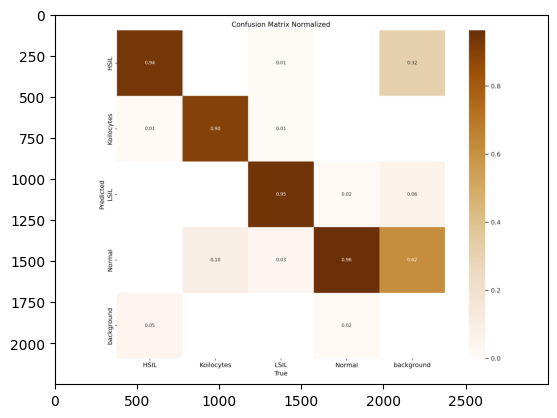

In [ ]:
conf_matrix = cv2.imread("/content/runs/detect/train/confusion_matrix_normalized.png")
plt.imshow(conf_matrix)
plt.show()

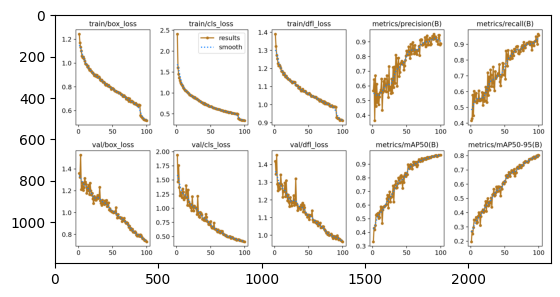

In [ ]:
results = cv2.imread("/content/runs/detect/train/results.png")
plt.imshow(results)
plt.show()

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:

results = model.val(data = "/content/Paps-Smear-Cells-4/data.yaml", imgsz = 640, device = 0, plots = True)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Paps-Smear-Cells-4/valid/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


                   all         76        558      0.879      0.966      0.966      0.805
                  HSIL         29        154      0.918      0.948       0.98      0.762
            Koilocytes          7         10      0.767      0.989      0.972      0.868
                  LSIL         35        116      0.945      0.966       0.95      0.784
                Normal         57        278      0.888       0.96      0.965      0.808
Speed: 0.9ms preprocess, 11.4ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/val
